# Step 1: Installation and Setup

In [ ]:
# Installing TensorFlow
%pip install --upgrade tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 26.3 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.19.0
    Uninstalling tensorboard-2.19.0:
      Successfully uninstalled tensorboard-2.19.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.19.0
    Uninstalling tensorflow-2.19.0:
      Successfully uninstalled tensorflow-2.19.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.19.0 requires tensorflow<2.20,>=2.19, but you have tensorflow 2.20.0 which is incompatible.
tensorflow-text 2.19.0 requires tensorflow<2.20,>=2.19.0, but you have tensorflow 2.20.0 which is incompatible.
tensorflow-decision-forests 1.12.0 requires tensorflow==2.19.0, but you have tensorflow 2.20.0 which is inc

In [ ]:
import tensorflow as tf

In [ ]:
print (tf.__version__)

2.20.0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Data Preprocessing

In [ ]:
# Importing the dataset
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
# Loading the dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
y_train.shape, y_test.shape

((60000,), (10000,))

In [ ]:
np.max(x_train), np.min(x_train), np.mean(x_train)

(np.uint8(255), np.uint8(0), np.float64(72.94035223214286))

In [ ]:
np.max(y_train), np.min(y_train)

(np.uint8(9), np.uint8(0))

In [ ]:
class_names = ['0 Top/T-shirt', '1 Trouser', '2 Pullover', '3 Dress', '4 Coat', '5 Sandal', '6 Shirt', '7 Sneaker', '8 Bag', '9 Ankle boot']
print(class_names)

['0 Top/T-shirt', '1 Trouser', '2 Pullover', '3 Dress', '4 Coat', '5 Sandal', '6 Shirt', '7 Sneaker', '8 Bag', '9 Ankle boot']


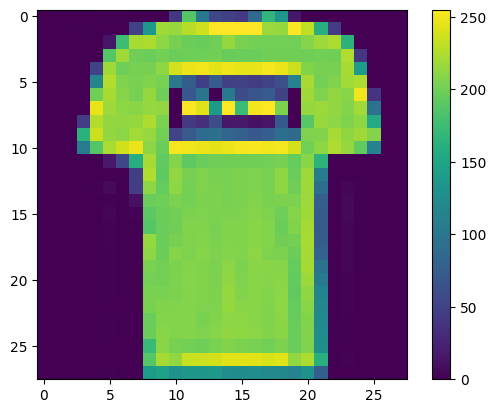

In [ ]:
# Data Exploration
plt.figure()
plt.imshow(x_train[1])
plt.colorbar()

In [ ]:
y_train[8]

NameError: name 'y_train' is not defined

In [ ]:
# Normalizing the dataset
x_train = x_train / 255.0
x_test = x_test / 255.0

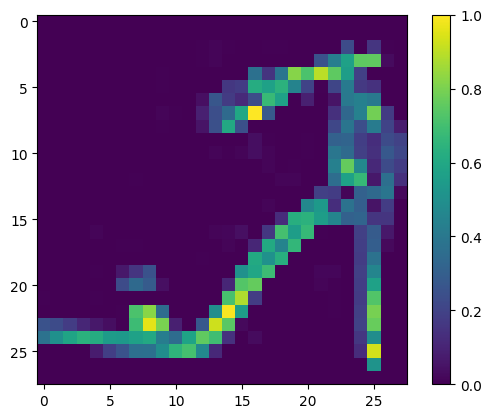

In [ ]:
plt.figure()
plt.imshow(x_train[8])
plt.colorbar()

In [ ]:
# Flattening the dataset
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

In [ ]:
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

# Step 3: Building the Model

In [ ]:
# Define an object
model = tf.keras.models.Sequential()
# sequence of layers

In [ ]:
# Adding first fully connected hidden layer
# 1) units (No of neurons) = 128
# 2) activation function = ReLU
# 3) input shape = 784
model = tf.keras.Sequential([
    tf.keras.Input(shape=(784,)),
    tf.keras.layers.Dense(128, activation='relu'),
])

In [ ]:
# Adding the second layer with dropout
model.add(tf.keras.layers.Dropout(0.3))
# regularization technique, prevents overfitting

In [ ]:
# Adding the output layer
# 1) units = 10
# 2) activation = softmax
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

# Step 4: Training the model

In [ ]:
# Compiling the model
# 1) Optimizer = adam, (minimize the loss function)
# 2) loss function = sparse_categorical_crossentropy, (acts as guide to optimizer)
# 3) metrices = sparse_categorical_accuracy

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Training the model
model.fit(x_train,y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - loss: 0.7146 - sparse_categorical_accuracy: 0.7488
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.4202 - sparse_categorical_accuracy: 0.8470
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - loss: 0.3916 - sparse_categorical_accuracy: 0.8565
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.3718 - sparse_categorical_accuracy: 0.8654
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.3533 - sparse_categorical_accuracy: 0.8696
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.3388 - sparse_categorical_accuracy: 0.8747
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.3265 - sparse_categorical_accuracy: 0.8801
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.3194 - sparse_categorical_accuracy: 0.8821
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.3060 - sparse_categorical_accuracy: 0.8842
Epoch 10/10
1875/1875 ━━━━━

# Step 5: Model evaluation and prediction

In [ ]:
# Model evaluation
test_loss, test_accuracy = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3374 - sparse_categorical_accuracy: 0.8799


In [ ]:
print('Test Accuracy: {}'.format(test_accuracy))

Test Accuracy: 0.8791000247001648


In [ ]:
# Model prediction
y_pred = np.argmax(model.predict(x_test), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
print(y_pred)

[9 2 1 ... 8 1 5]


In [ ]:
y_pred[0]  # Predicted output

np.int64(9)

In [ ]:
y_test[0]  # Actual Ouput

np.uint8(9)

In [ ]:
np.array([y_pred[110], y_test[110]])

array([2, 2])

In [ ]:
print(class_names)

['0 Top/T-shirt', '1 Trouser', '2 Pullover', '3 Dress', '4 Coat', '5 Sandal', '6 Shirt', '7 Sneaker', '8 Bag', '9 Ankle boot']


In [ ]:
# Confusion metrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[877   0   8  14   3   0  95   0   3   0]
 [  3 963   1  24   2   0   4   0   3   0]
 [ 17   0 789   8  93   0  92   0   1   0]
 [ 36   6   8 889  22   0  37   0   2   0]
 [  0   0  93  44 765   0  97   0   1   0]
 [  0   0   0   0   0 964   0  23   1  12]
 [156   1  86  26  59   0 661   0  11   0]
 [  0   0   0   0   0  19   0 965   0  16]
 [  6   1   4   8   2   2   3   3 971   0]
 [  0   0   0   0   0  11   1  41   0 947]]


In [ ]:
acc_cm = accuracy_score(y_test, y_pred)
print(acc_cm)

0.8791
